# Exploratory Data Analysis of Transactions Data

Importing the data and performing data manipulations

In [1]:
import os
os.chdir('H:/My Documents/Python/New folder')
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns

##### Read transactions data and just looking at the columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
trans = pd.read_csv('transactions.csv')
trans.head(10)

In [3]:
#Overview of the data set
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21547746 entries, 0 to 21547745
Data columns (total 9 columns):
msno                      object
payment_method_id         int64
payment_plan_days         int64
plan_list_price           int64
actual_amount_paid        int64
is_auto_renew             int64
transaction_date          int64
membership_expire_date    int64
is_cancel                 int64
dtypes: int64(8), object(1)
memory usage: 1.4+ GB


The data has 21,547,745 million rows of data and 9 columns.

**msno:** user id
**payment_method_id:** payment method
**payment_plan_days:** length of membership plan in days
**plan_list_price:** in New Taiwan Dollar (NTD)
**actual_amount_paid:** in New Taiwan Dollar (NTD)
**is_auto_renew**
**transaction_date:** format %Y%m%d
**membership_expire_date:** format %Y%m%d
**is_cancel:** whether or not the user canceled the membership in this transaction.

In [4]:
#The date is not in proper format and stored as an integer
transactions['transaction_date'].head(10)

0    20150930
1    20150930
2    20150930
3    20150930
4    20150930
5    20150930
6    20150930
7    20150930
8    20150930
9    20150930
Name: transaction_date, dtype: int64

##### Converting Date Columns - transaction_date and membership_expire_date

In [5]:
transactions['transaction_date'] = transactions['transaction_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
transactions['transaction_date'].head(10)

0   2015-09-30
1   2015-09-30
2   2015-09-30
3   2015-09-30
4   2015-09-30
5   2015-09-30
6   2015-09-30
7   2015-09-30
8   2015-09-30
9   2015-09-30
Name: transaction_date, dtype: datetime64[ns]

In [6]:
transactions['membership_expire_date'] = transactions['membership_expire_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
transactions['membership_expire_date'].head(10)

0   2015-11-01
1   2015-10-31
2   2016-04-27
3   2015-11-28
4   2015-11-21
5   2015-11-07
6   2015-11-28
7   2015-11-25
8   2015-12-22
9   2015-11-18
Name: membership_expire_date, dtype: datetime64[ns]

##### Testing for NULL values

In [7]:
transactions.isnull().sum()

0

The above shows that there are no NULL values within the dataframe.

##### Variable: msno

In [8]:
#The number of unique users in transactions file
len(transactions['msno'].unique())

2363626

##### Variable: Payment_method_id

In [9]:
#Checking the unique payment method ids
print(transactions['payment_method_id'].unique())
print("The number of unique ids used are:", transactions['payment_method_id'].nunique())

[41 39 21 37 40 34 33 31 23 38 19 24 14 36 27 35 30 29 28 22 26 32 25 20 17
  5 18 11  7 13 12 16 10 15  8  6  3  2  4  1]
The number of unique ids used are: 40


In [10]:
#Popularity of payment_methods among transactions
paymentmethod = transactions.groupby('payment_method_id').size()
paymentmethod.sort_values()

payment_method_id
1           12
4           15
2           52
3          210
6          466
5          474
8          657
7         1094
10        1326
15        1479
11        2129
12        3834
26        4591
13        6571
17        7437
16       11064
14       13621
25       13780
18       16177
24       16196
22       20130
21       22883
20       28278
19       32073
23       42386
27       62525
28       95733
29      113885
32      146481
30      160957
31      252342
33      411164
35      541399
34      731539
36      855115
37     1007689
39     1466655
38     1703590
40     2225283
41    11526454
dtype: int64

**The users are grouped by the number of transactions in the data**

In [11]:
users_by_trans = transactions.groupby(['msno']).size()

In [12]:
users_by_trans

msno
+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=     1
+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=     1
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=     4
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=    19
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=    26
++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=    12
++/Gw1B9K+XOlB3hLTloeUK2QlCa2m+BJ8TrzGf7djI=     9
++/TR7WI15q2ZCtOXmoap7jR+kEhbMVE5swOqsfqpqI=     9
++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=    19
++/ZHqwUNa7U21Qz+zqteiXlZapxey86l6eEorrak/g=    21
++/gTmVgKUbNFmsTiriZdWV1uZIrLXCUiEWN0fEU6BM=     5
++/imsKMXignukHBIRfOhocobbR8Qk1Ew5mhjOCJg5A=     1
++0+IdHga8fCSioOVpU8K7y4Asw8AveIApVH2r9q9yY=     1
++0/NopttBsaAn6qHZA2AWWrDg7Me7UOMs1vsyo4tSI=    12
++02XbtviomSxcIBUHMOiJkjRxdicTXSfiVqLdsr5lo=     1
++096narOxHnDPtbtUtB4WDqDy8EJacQypdqDYBHmmY=     1
++0BJXY8tpirgIhJR14LDM1pnaRosjD1mdO1mIKxlJA=    16
++0EzISdtKY48Z0GY62jer/LFQwrNIAbADdtU5xStGY=     6
++0GCV3WGMjibrwCnDuVZXMoIxs1mnMRaD7rFJFU2Ho=     1
++0JQqGo/czgqG5qCY31TYkzV7

In [13]:
print("The users with transactions more than once:",sum(users_by_trans.values > 1))
print("The users with one transaction :",sum(users_by_trans.values == 1))

The users with transactions more than once: 1771525
The users with one transaction : 592101


##### Variable: Payment_plan_days

In [14]:
transactions['payment_plan_days'].unique()

array([ 30,   0,  10,  31,   7, 410, 195, 100, 395,   1, 180, 120,  60,
       400,  14, 360, 200,  35,  90,  21, 240, 450,  70,  80,  45, 110,
       365,  66, 270,  99,   2, 230,   3,  15, 425, 415,  95], dtype=int64)

In [15]:
transactions['is_cancel'].unique()

array([0, 1], dtype=int64)

In [16]:
transactions['plan_list_price'].unique()

array([ 129,  149,    0,   99,  100,  119,  150, 1788,  180,  894,   50,
        120,  500, 1599,  536,  799,  480,  477,  596, 1200,  300,  930,
        699,  450,   35,  447,  105,  298,  134, 1000,  350,  124,  400,
          1,  131,  126,   10, 1150,   70, 1520,  265,  143, 2000,  800,
         15,   30,  210,  760,  600, 1825,   44], dtype=int64)

In [17]:
transactions['is_auto_renew'].unique()

array([1, 0], dtype=int64)

In [18]:
#Converting to categorical data
transactions['payment_method_id'] = transactions['payment_method_id'].astype('category')
transactions['is_auto_renew'] = transactions['is_auto_renew'].astype('category')
transactions['is_cancel'] = transactions['is_cancel'].astype('category')

In [19]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21547746 entries, 0 to 21547745
Data columns (total 9 columns):
msno                      object
payment_method_id         category
payment_plan_days         int64
plan_list_price           int64
actual_amount_paid        int64
is_auto_renew             category
transaction_date          datetime64[ns]
membership_expire_date    datetime64[ns]
is_cancel                 category
dtypes: category(3), datetime64[ns](2), int64(3), object(1)
memory usage: 1.0+ GB


## Data Exploration and Visualisation

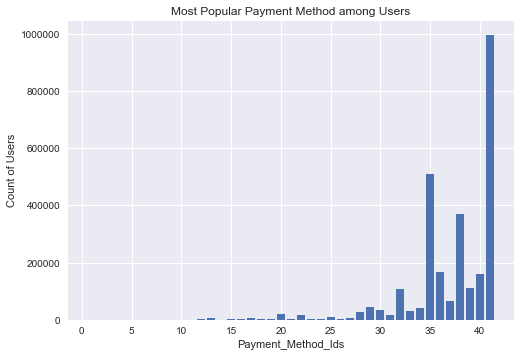

In [20]:
#Popularity of Payment method among users
#This shows us the payment method used by most users within the transactions dataset
paymentmethod = transactions.groupby('payment_method_id')['msno'].nunique()
x = paymentmethod.keys()
y = paymentmethod
plt.bar(x,y,0.8)
#plt.ylim([0,12000000])
plt.title('Most Popular Payment Method among Users')
plt.xlabel('Payment_Method_Ids')
plt.ylabel('Count of Users')
plt.show()

##### INSIGHTS: <br>The most popular method of payment among users is 'payment_method_id' = 41

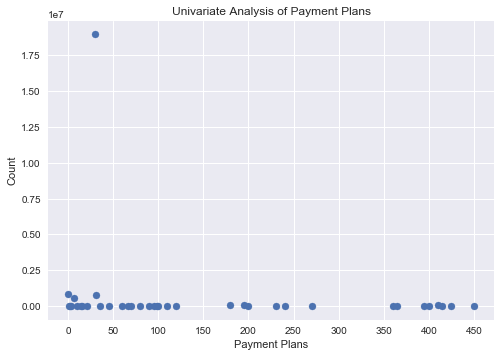

In [21]:
#Univariate Analysis of Membership Plan
paymentplan = transactions.groupby('payment_plan_days').size()
x = paymentplan.keys()
y = paymentplan
plt.scatter(x,y)
plt.xticks(np.arange(0, 500, 50))
plt.title('Univariate Analysis of Payment Plans')
plt.xlabel('Payment Plans')
plt.ylabel('Count')
plt.show()

##### INSIGHTS: <br>Most transactions have been performed for Payment Plan of 30 days.<br>                                                                                                                                          There are transactions with Payment Plan of 0 days. This data needs to be analysed further.<br>                                                                                                The largest plan is for about 450 days i.e for 15 months

In [22]:
#Number of Transactions on Auto_Renewal
auto_renewal = transactions.groupby('is_auto_renew').size()

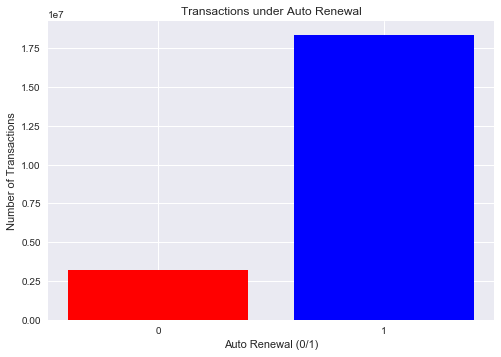

In [23]:
x = (0,1)
y = auto_renewal
plt.bar(x,y,0.8)
plt.xticks([0,1])
plt.title('Transactions under Auto Renewal')
plt.xlabel('Auto Renewal (0/1)')
plt.ylabel('Number of Transactions')
plt.bar(x[0],y[0], color = 'red') #making non auto-renewals => RED
plt.bar(x[1],y[1], color = 'blue') #making auto-renewals => BLUE
plt.show()


##### INSIGHTS:<br> The bulk of transactions are auto-renewals.

In [24]:
#Number of Transaction that are Cancelled
cancelled = transactions.groupby('is_cancel').size()

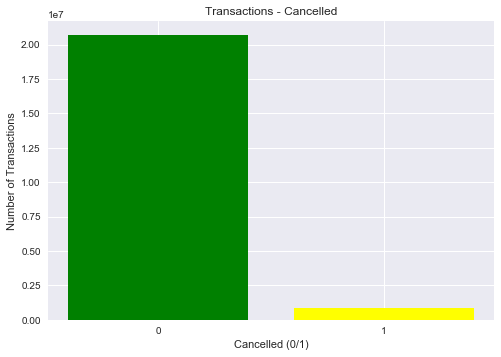

In [25]:
x = cancelled.keys()
y = cancelled
plt.bar(x,y,0.8)
plt.xticks([0,1])
plt.title('Transactions - Cancelled')
plt.xlabel('Cancelled (0/1)')
plt.ylabel('Number of Transactions')
plt.bar(x[0],y[0], color = 'green') #cancellation - no => GREEN
plt.bar(x[1],y[1], color = 'yellow') #cancellation - yes => YELLOW
plt.show()

In [27]:
#Checking for trends across the dates
trans_dates = transactions['transaction_date'].value_counts()

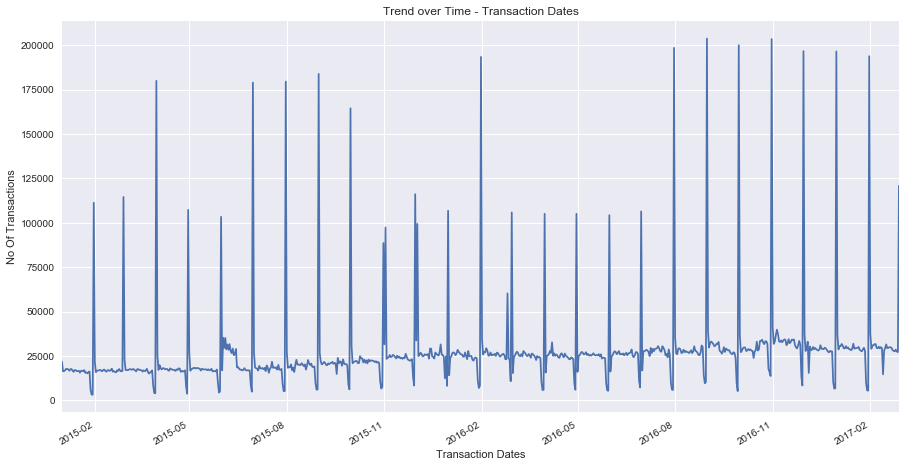

In [56]:
trans_dates.plot(kind ="line",figsize=(15,8))
plt.title("Trend over Time - Transaction Dates")
plt.xlabel("Transaction Dates")
plt.ylabel("No Of Transactions")
plt.show()

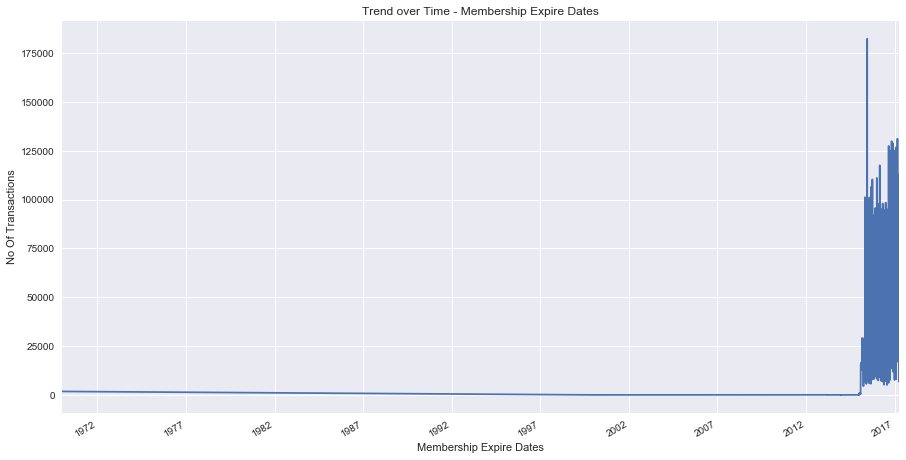

In [57]:
#Looking at Expiration Dates
expire_dates = transactions['membership_expire_date'].value_counts()
expire_dates.plot(kind = "line",figsize=(15,8))
plt.title("Trend over Time - Membership Expire Dates")
plt.xlabel("Membership Expire Dates")
plt.ylabel("No Of Transactions")
plt.show()

##### INSIGHTS: From here it is seen that the data starts from 1972, but there is no useful information here.

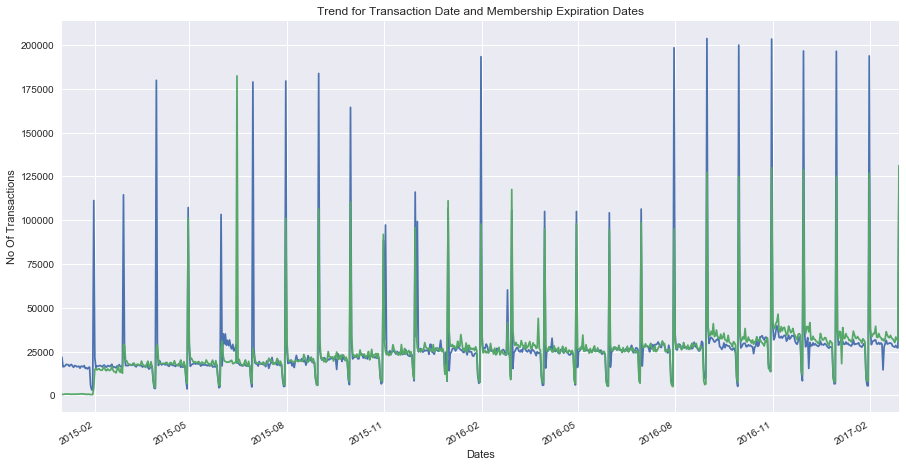

In [66]:
#Comparing Transaction Dates and Membership Expiration Dates
trans_dates = transactions['transaction_date'].value_counts()
expire_dates = transactions['membership_expire_date'].value_counts()
expire_dates_n = expire_dates['2015-01-01':'2017-02-28'] #Retaining only dates from 2015-2017
trans_dates.plot(kind ="line",figsize=(15,8))
expire_dates_n.plot(kind = "line",figsize=(15,8))
plt.title("Trend for Transaction Date and Membership Expiration Dates")
plt.xlabel("Dates")
plt.ylabel("No Of Transactions")
plt.show()

In [37]:
#Since this data was mess to read, we drilled down further by months
#Counting the number of transactions by month
transactions.index = transactions['transaction_date']
trans_month = transactions.resample('M').count()

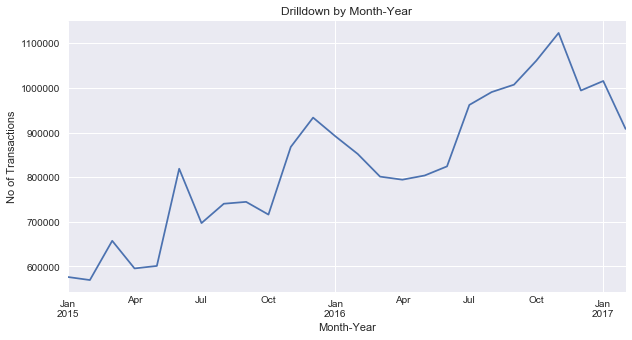

In [46]:
trans_month['msno'].plot(kind = "line",figsize=(10,5))
plt.title("Drilldown by Month-Year")
plt.xlabel("Month-Year")
plt.ylabel("No of Transactions")
plt.show()

##### INSIGHTS:<br> A general look at the trend shows us that the number of transactions have risen over time. <br> Both in 2016 and 2017 the number of transactions seems to have peeked around Oct-Nov.